# Is it a banger?

In [1]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd
%matplotlib inline

In [90]:
df = pd.read_pickle("../data/processed_dataset.pkl")

In [91]:
def plot_waveforms(df, idx):
    audio = df.iloc[idx].audio
    log_specgram = df.iloc[idx].log_specgram
    filename = df.iloc[idx].name
    label = df.iloc[idx].label
    # audio is np.array holding sample values, log_specgram is 2-dim np.array
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    librosa.display.waveplot(audio, sr=22050)
    plt.subplot(1, 2, 2)
    librosa.display.specshow(log_specgram, x_axis='time',y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.suptitle(filename + ", label = \"" + label + "\".")


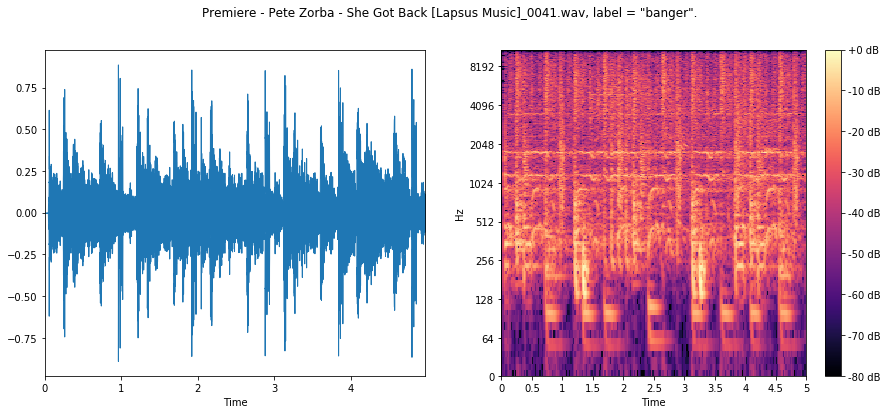

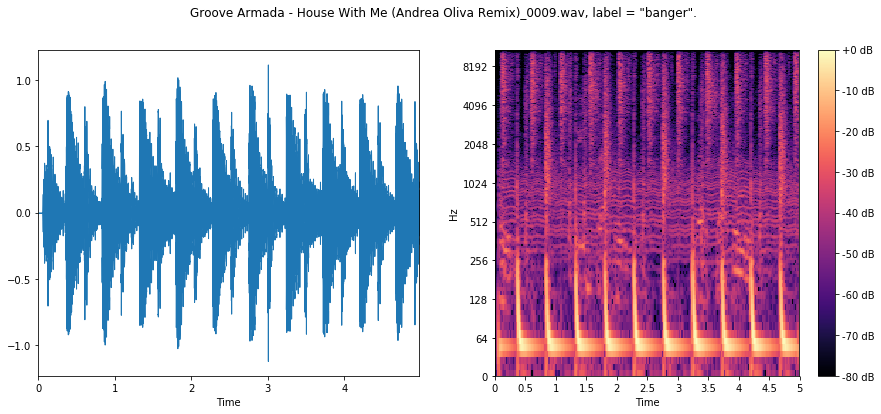

In [92]:
plot_waveforms(df, 1)
plot_waveforms(df, 4)

## Establish baseline

In [93]:
naive_accuracy = (max(df[df["label"] == "banger"].index.size, df[df["label"] == "not_a_banger"].index.size) \
                  / (float)(df.index.size))
print ("This is the accuracy if we always guess max{# banger, #not_a_banger}: %.2f" % naive_accuracy)

This is the accuracy if we always guess max{# banger, #not_a_banger}: 0.62


## Form the training and testing data sets¶

In [94]:
train_frac = 0.8

def split_train_test(df, train_frac=0.8):
    include = np.random.rand(*df.index.shape)
    is_train = include < train_frac
    train_data = df[is_train]
    test_data = df[~is_train]
    return train_data, test_data
                
train_data, test_data = split_train_test(df, train_frac)

In [95]:
print(train_data.shape)
print(test_data.shape)

(1284, 4)
(350, 4)


In [98]:
log_specgram_shape = df.iloc[0]["log_specgram"].shape

def export_numpy_features(df):
    x = np.vstack(df["log_specgram"]).reshape(df.shape[0], *log_specgram_shape, 1).astype(np.float32)
    y = np.vstack(df["label_one_hot"])
    return x, y
    
#train_x, train_y = export_numpy_features(train_data)
#test_x, test_y = export_numpy_features(test_data)

for index, row in df.iterrows() :
     print(row['audio'].shape, row['log_specgram'].shape, index)

(109750,) (1025, 215) Patrick Topping - Be Sharp Say Nowt_0031.wav
(109750,) (1025, 215) Premiere - Pete Zorba - She Got Back [Lapsus Music]_0041.wav
(109750,) (1025, 215) The Tribe Of Good - Loving You Baby (Weiss Remix)_0034.wav
(109750,) (1025, 215) Premiere - Marco Strous - That's My Jam [Cr2 Records]_0005.wav
(109750,) (1025, 215) Groove Armada - House With Me (Andrea Oliva Remix)_0009.wav
(109750,) (1025, 215) Selected New Year Mix_0215.wav
(109750,) (1025, 215) Premiere - Raumakustik - Can't Get Enough [Toolroom Records]_0002.wav
(109750,) (1025, 215) Hosse - Ready For This (Raffa FL Remix)_0023.wav
(109750,) (1025, 215) The Lumineers - Slow It Down (Live on KEXP)_0062.wav
(109750,) (1025, 215) Enya   The Best Of Enya FULL ALBUM_0396.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_0555.wav
(109750,) (1025, 215) 50 Cent - Just A Lil Bit (Paradox City Edit) (Free Download)_0030.wav
(109750,) (1025, 215) The Lumineers - Ho Hey (Officia

(109750,) (1025, 215) Premiere - Raumakustik - Can't Get Enough [Toolroom Records]_0073.wav
(109750,) (1025, 215) Best Of 2017 Tech House Yearmix_0424.wav
(109750,) (1025, 215) Technasia - I Am Somebody (Original Mix)_0045.wav
(109750,) (1025, 215) Sleep On The Floor (LYRICS) - The Lumineers_0020.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_0698.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_1269.wav
(109750,) (1025, 215) Shiba San & Green Velvet - Chance_0021.wav
(109750,) (1025, 215) Hosse - Ready For This (Raffa FL Remix)_0051.wav
(109750,) (1025, 215) Enya   The Best Of Enya FULL ALBUM_0586.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_1179.wav
(109750,) (1025, 215) The Lumineers - Gale Song [Lyrics]_0010.wav
(109750,) (1025, 215) PAWSA - Groovy Cat_0012.wav
(109750,) (1025, 215) Gun Song (LYRICS) - The Lumineers_0003.wav
(109750,) (1025

(109750,) (1025, 215) Premiere - De La Swing - Creeper [Elrow Music]_0057.wav
(109750,) (1025, 215) Claptone - The Music Got Me (Darius Syrossian Remix)_0029.wav
(109750,) (1025, 215) Thick Dick - Welcome To The Jungle (Andrea Oliva Remix)_0052.wav
(109750,) (1025, 215) Technasia - I Am Somebody (Original Mix)_0069.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_0452.wav
(109750,) (1025, 215) 50 Cent - Just A Lil Bit (Paradox City Edit) (Free Download)_0031.wav
(109750,) (1025, 215) Detlef - JayDee_0035.wav
(109750,) (1025, 215) Best Of 2017 Tech House Yearmix_0047.wav
(109750,) (1025, 215) Simone Liberali - Panameras_0012.wav
(109750,) (1025, 215) Enya   The Best Of Enya FULL ALBUM_0233.wav
(52416,) (1025, 103) The Lumineers - Flowers in your hair ( lyrics )_0022.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_0681.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Mus

(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_1360.wav
(109750,) (1025, 215) Best Of 2017 Tech House Yearmix_0355.wav
(109750,) (1025, 215) Claptone - The Music Got Me (Darius Syrossian Remix)_0010.wav
(109750,) (1025, 215) The Lumineers - Big Parade_0000.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_0908.wav
(109750,) (1025, 215) Mark Jenkyns - Sirens_0082.wav
(109750,) (1025, 215) Groove Armada - House With Me (Andrea Oliva Remix)_0015.wav
(109750,) (1025, 215) Best Of 2017 Tech House Yearmix_0647.wav
(109750,) (1025, 215) Premiere - Raumakustik - Can't Get Enough [Toolroom Records]_0063.wav
(109750,) (1025, 215) Theme - The Lumineers - Scotland_0019.wav
(109750,) (1025, 215) Enya   The Best Of Enya FULL ALBUM_0395.wav
(109750,) (1025, 215) TECH-HOUSE - Max Chapman - La Fiesta [Hot Creations]_0083.wav
(109750,) (1025, 215) FISHER - Ya Kidding_0021.wav
(109750,) (1025, 215) Enya   The Best Of

(109750,) (1025, 215) Sean Roman - I Wanna_0012.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_1228.wav
(109750,) (1025, 215) Best Of 2017 Tech House Yearmix_0434.wav
(109750,) (1025, 215) Best Of 2017 Tech House Yearmix_0367.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_1029.wav
(109750,) (1025, 215) Premiere - Marco Strous - That's My Jam [Cr2 Records]_0019.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_0589.wav
(109750,) (1025, 215) Best Of 2017 Tech House Yearmix_0260.wav
(109750,) (1025, 215) The Lumineers - Slow It Down (Live on KEXP)_0008.wav
(109750,) (1025, 215) Raumakustik - Dem A Pree (Patrick Topping Remix)_0076.wav
(109750,) (1025, 215) Caal & Baum - This Story (Raffa FL Remix)_0049.wav
(109750,) (1025, 215) Cliff Richard - Greatest Hits 1958-1962 (Not Now Music) [Full Album]_0189.wav
(109750,) (1025, 215) Selected New Year Mix_01

In [11]:
import tensorflow as tf
tf.set_random_seed(1234)

In [55]:
# convolution params
CONV_STRIDE_LENGTH = 1
CONV_WINDOW_LENGTH = 5
MAX_POOL_STRIDE_LENGTH = 2

# features
CONV_1_NUM_FEATURES = 32
CONV_2_NUM_FEATURES = 16
DENSE_NUM_FEATURES = 256

# training
NUM_LABELS = df.label.unique().size
BATCH_SIZE = 50
NUM_EPOCHS = 1000
LEARNING_RATE = 1e-4
LOG_TRAIN_STEPS = 1

In [56]:
# This node is where we feed a batch of the training data and labels at each training step
x = tf.placeholder(tf.float32,shape=(None, *log_specgram_shape, 1))
y_ = tf.placeholder(tf.float32, shape=(None, len(df.label.unique())))

In [57]:
# Weight initialisation functions
 
# small noise for symmetry breaking and non-zero gradients
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# ReLU neurons - initialise with small positive bias to stop 'dead' neurons
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [58]:
# Convolutions + max pooling

# format: strides = [1, stride, stride, 1]
# W is filter
# input tensor of shape [batch, in_height, in_width, in_channels] 
# and a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]
def conv2d(x, W):  
    return tf.nn.conv2d(x, W, strides=[1, CONV_STRIDE_LENGTH, CONV_STRIDE_LENGTH, 1], padding='SAME')

# ksize is filter size
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, MAX_POOL_STRIDE_LENGTH, MAX_POOL_STRIDE_LENGTH, 1],
                        strides=[1, MAX_POOL_STRIDE_LENGTH, MAX_POOL_STRIDE_LENGTH, 1], padding='SAME')



### First Convolutional Layer
We can now implement our first layer. It will consist of convolution, followed by max pooling. The convolution will compute 32 features for each 5x5 patch. Its weight tensor will have a shape of `[5, 5, 1, 32]`. The first two dimensions are the patch size, the next is the number of input channels, and the last is the number of output channels. We will also have a bias vector with a component for each output channel.

In [59]:
W_conv1 = weight_variable([CONV_WINDOW_LENGTH, CONV_WINDOW_LENGTH, 1, CONV_1_NUM_FEATURES])
b_conv1 = bias_variable([CONV_1_NUM_FEATURES])

In [60]:
h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [61]:
h_pool1.shape # check shape

TensorShape([Dimension(None), Dimension(513), Dimension(22), Dimension(32)])

### Second Convolutional Layer

In order to build a deep network, we stack several layers of this type. The second layer will have 16 features for each 5x5 patch.

In [62]:
W_conv2 = weight_variable([CONV_WINDOW_LENGTH, CONV_WINDOW_LENGTH, CONV_1_NUM_FEATURES, CONV_2_NUM_FEATURES])
b_conv2 = bias_variable([CONV_2_NUM_FEATURES])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# 2x2 maxpool gives image dimensions np.ceil(np.array(log_specgram_shape)/2).astype(int)

In [63]:
h_pool2.shape

TensorShape([Dimension(None), Dimension(257), Dimension(11), Dimension(16)])

### Densely Connected Layer

Now that the image size has been reduced to `$SHAPE`, we add a fully-connected layer with 256 neurons to allow processing on the entire image. We reshape the tensor from the pooling layer into a batch of vectors, multiply by a weight matrix, add a bias, and apply a ReLU.

In [64]:
def scale_shape_maxpool2x2(shape_tuple):
    return np.ceil(np.array(shape_tuple)/2).astype(int)

log_specgram_shape_reduced = scale_shape_maxpool2x2(scale_shape_maxpool2x2(log_specgram_shape))

W_fc1 = weight_variable([np.prod(log_specgram_shape_reduced) * CONV_2_NUM_FEATURES, DENSE_NUM_FEATURES])
b_fc1 = bias_variable([DENSE_NUM_FEATURES])

h_pool2_flat = tf.reshape(h_pool2, [-1, np.prod(log_specgram_shape_reduced) * CONV_2_NUM_FEATURES])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [65]:
h_pool2_flat.shape

TensorShape([Dimension(None), Dimension(45232)])

### Dropout

To reduce overfitting, we will apply dropout before the readout layer. We create a `placeholder` for the probability that a neuron's output is kept during dropout. This allows us to turn dropout on during training, and turn it off during testing. TensorFlow's `tf.nn.dropout` op automatically handles scaling neuron outputs in addition to masking them, so dropout just works without any additional scaling.

In [66]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### Readout Layer

Finally, we add a layer, just like for the one layer softmax regression.

In [67]:
W_fc2 = weight_variable([DENSE_NUM_FEATURES, NUM_LABELS])
b_fc2 = bias_variable([NUM_LABELS])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

### Batching function

In [68]:
def return_batch(df, batch_size=10):
    batch_df = df.sample(batch_size)
    x = np.vstack(batch_df["log_specgram"]).reshape(batch_df.shape[0], *log_specgram_shape, 1).astype(np.float32)
    y = np.vstack(batch_df["label_one_hot"])
    return x, y

### Time logging

In [ ]:
import time

def estimate_time_remaining(time_in, current_step, steps_gap, total_steps):
    current_time = time.time() - time_in
    time_per_step = current_time / steps_gap
    time_remaining = (total_steps - current_step) * time_per_step
    m, s = divmod(time_remaining, 60)
    h, m = divmod(m, 60)
    print("Approximately %d hours, %02d minutes, %02d seconds remaining." % (h, m, s))
    

### Train and Evaluate the Model

How well does this model do? To train and evaluate it we will use code that is nearly identical to that for the simple one layer SoftMax network above.

The differences are that:

- We will replace the steepest gradient descent optimizer with the more sophisticated ADAM optimizer.
- We will include the additional parameter `keep_prob` in `feed_dict` to control the dropout rate.
- We will add logging to every 100th iteration in the training process.

We will also use `tf.Session` rather than `tf.InteractiveSession`. This better separates the process of creating the graph (model specification) and the process of evaluating the graph (model fitting). It generally makes for cleaner code. The `tf.Session` is created within a with block so that it is automatically destroyed once the block is exited.

Feel free to run this code. Be aware that it does 200 training iterations and may take a while (possibly up to half an hour), depending on your processor.

In [69]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

with sess.as_default():
    current_time = time.time()
    for i in range(NUM_EPOCHS):
        batch = return_batch(train_data, BATCH_SIZE)
        
        # logging
        if i % LOG_TRAIN_STEPS == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %.2f' % (i, train_accuracy))
            estimate_time_remaining(current_time, i, LOG_TRAIN_STEPS, NUM_EPOCHS)
            current_time = time.time()

        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    
    test_batch = return_batch(test_data, test_data.shape[0])
    test_accuracy = accuracy.eval(feed_dict={
          x: test_batch[0], y_: test_batch[1], keep_prob: 1.0})
    print('test accuracy %.2f' % test_accuracy)

    saver = tf.train.Saver()
    save_path = saver.save(sess, "model.ckpt")
    print("Model saved in file: %s" % save_path)


step 0, training accuracy 0.58
step 1, training accuracy 0.84
step 2, training accuracy 0.74
step 3, training accuracy 0.88
step 4, training accuracy 0.84
step 5, training accuracy 0.80
step 6, training accuracy 0.82
step 7, training accuracy 0.80
step 8, training accuracy 0.40
step 9, training accuracy 0.70
step 10, training accuracy 0.82
step 11, training accuracy 0.84
step 12, training accuracy 0.84
step 13, training accuracy 0.88
step 14, training accuracy 0.88
step 15, training accuracy 0.80
step 16, training accuracy 0.92
step 17, training accuracy 0.86
step 18, training accuracy 0.86
step 19, training accuracy 0.80
step 20, training accuracy 0.82
step 21, training accuracy 0.92
step 22, training accuracy 0.84
step 23, training accuracy 0.88
step 24, training accuracy 0.78
step 25, training accuracy 0.86
step 26, training accuracy 0.88
step 27, training accuracy 0.90
step 28, training accuracy 0.86
step 29, training accuracy 0.80
step 30, training accuracy 0.82
step 31, training 

step 252, training accuracy 0.84
step 253, training accuracy 0.94
step 254, training accuracy 0.86
step 255, training accuracy 0.88
step 256, training accuracy 0.90
step 257, training accuracy 0.86
step 258, training accuracy 0.90
step 259, training accuracy 0.84
step 260, training accuracy 0.82
step 261, training accuracy 0.86
step 262, training accuracy 0.92
step 263, training accuracy 0.92
step 264, training accuracy 0.96
step 265, training accuracy 0.92
step 266, training accuracy 0.98
step 267, training accuracy 0.92
step 268, training accuracy 0.94
step 269, training accuracy 0.84
step 270, training accuracy 0.90
step 271, training accuracy 0.86
step 272, training accuracy 0.92
step 273, training accuracy 0.90
step 274, training accuracy 0.98
step 275, training accuracy 0.88
step 276, training accuracy 0.96
step 277, training accuracy 0.90
step 278, training accuracy 0.94
step 279, training accuracy 0.88
step 280, training accuracy 0.92
step 281, training accuracy 0.76
step 282, 

step 501, training accuracy 0.96
step 502, training accuracy 0.92
step 503, training accuracy 0.94
step 504, training accuracy 0.92
step 505, training accuracy 0.98
step 506, training accuracy 0.94
step 507, training accuracy 0.94
step 508, training accuracy 0.90
step 509, training accuracy 0.94
step 510, training accuracy 0.92
step 511, training accuracy 0.98
step 512, training accuracy 0.92
step 513, training accuracy 0.92
step 514, training accuracy 0.94
step 515, training accuracy 0.88
step 516, training accuracy 0.90
step 517, training accuracy 0.86
step 518, training accuracy 0.96
step 519, training accuracy 0.96
step 520, training accuracy 0.92
step 521, training accuracy 0.94
step 522, training accuracy 0.98
step 523, training accuracy 0.92
step 524, training accuracy 0.94
step 525, training accuracy 0.88
step 526, training accuracy 0.94
step 527, training accuracy 0.96
step 528, training accuracy 0.96
step 529, training accuracy 0.86
step 530, training accuracy 0.90
step 531, 

step 750, training accuracy 0.96
step 751, training accuracy 0.96
step 752, training accuracy 0.92
step 753, training accuracy 1.00
step 754, training accuracy 1.00
step 755, training accuracy 1.00
step 756, training accuracy 0.94
step 757, training accuracy 1.00
step 758, training accuracy 0.92
step 759, training accuracy 0.94
step 760, training accuracy 0.92
step 761, training accuracy 0.94
step 762, training accuracy 0.92
step 763, training accuracy 0.94
step 764, training accuracy 0.98
step 765, training accuracy 0.92
step 766, training accuracy 0.96
step 767, training accuracy 1.00
step 768, training accuracy 0.94
step 769, training accuracy 0.92
step 770, training accuracy 0.96
step 771, training accuracy 0.98
step 772, training accuracy 0.96
step 773, training accuracy 1.00
step 774, training accuracy 1.00
step 775, training accuracy 0.92
step 776, training accuracy 0.90
step 777, training accuracy 0.96
step 778, training accuracy 0.96
step 779, training accuracy 0.96
step 780, 

step 999, training accuracy 0.92
test accuracy 0.85
